In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#from util import config

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
mnist.test.cls = np.argmax(mnist.test.labels, axis=1)

In [3]:
img_size = 28

img_size_flat = img_size * img_size

img_shape = (img_size, img_size)

num_channels = 1

num_classes = 10

In [4]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [5]:
# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=16, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

# layer_conv2
net = tf.layers.conv2d(inputs=net, name='layer_conv2', padding='same',
                       filters=36, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

print(net)

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.flatten instead.


In [6]:
net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=128, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

Instructions for updating:
Use keras.layers.Dense instead.
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)


In [10]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits))
optimizer = tf.train.AdamOptimizer(0.5).minimize(loss)

In [102]:
pred = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))

In [11]:
y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [103]:
trainable_var_list = tf.trainable_variables()

In [15]:
def get_weights_variable(layer_name) :
    with tf.variable_scope(layer_name, reuse=True) :
        variable = tf.get_variable('kernel')
    return variable

In [16]:
weights_conv1 = get_weights_variable(layer_name='layer_conv1')
weights_conv2 = get_weights_variable(layer_name='layer_conv2')
print(weights_conv1)
print(weights_conv2)

weights_fc1 = get_weights_variable(layer_name='layer_fc1')
weights_fc_out = get_weights_variable(layer_name='layer_fc_out')
print(weights_fc1)
print(weights_fc_out)

<tf.Variable 'layer_conv1/kernel:0' shape=(5, 5, 1, 16) dtype=float32_ref>
<tf.Variable 'layer_conv2/kernel:0' shape=(5, 5, 16, 36) dtype=float32_ref>
<tf.Variable 'layer_fc1/kernel:0' shape=(1764, 128) dtype=float32_ref>
<tf.Variable 'layer_fc_out/kernel:0' shape=(128, 10) dtype=float32_ref>


In [59]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

grads = tf.gradients(loss, weights_fc_out)

In [60]:
hessian = tf.reduce_sum(tf.hessians(loss, weights_fc_out)[0], axis = 2)

In [20]:
train_batch_size = 64

total_iterations = 0

In [104]:
def optimize(num_iterations):
    global total_iterations

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        x_batch, y_true_batch = mnist.train.next_batch(tf.random(train_batch_size))

        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        sess.run(optimizer, feed_dict=feed_dict_train)

        if i % 10 == 0:
            # Calculate the accuracy on the training-set.
            los, acc = sess.run([loss, accuracy], feed_dict=feed_dict_train)
            
            grads_vals, hess_vals = sess.run([grads, hessian], feed_dict=feed_dict_train)
            
#            print(grads_vals.shape)
#            print(hess_vals.shape)

            msg = "Iteration: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}"

            # Print it.
            print(msg.format(i + 1, los, acc))
            
        if i % 3 == 2:
            w_weights.append(get_weights_variable(layer_name='layer_fc1'))
            l_weights.append(get_weights_variable(layer_name='layer_fc_out'))
            accu.append()
            
    total_iterations += num_iterations

In [101]:
weights_list = []
l_weights = []

for i in range(8):
    if i % 3 == 2:
        weights_list.append(tf.get_variable_scope('layer_fc1'))
        l_weights.append(get_weights_variable(layer_name='layer_fc_out'))
        
    for epoch in range(16) :
        x_batch, y_true_batch = mnist.train.next_batch(train_batch_size)

        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        sess.run(optimizer, feed_dict=feed_dict_train)

        if i % 10 == 0:
            # Calculate the accuracy on the training-set.
            los, acc = sess.run([loss, accuracy], feed_dict=feed_dict_train)

            grads_vals, hess_vals = sess.run([grads, hessian], feed_dict=feed_dict_train)

    #            print(grads_vals.shape)
    #            print(hess_vals.shape)

            msg = "Iteration: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}"

            # Print it.
            print(msg.format(i + 1, los, acc))

    

Iteration:      1, Training Loss: 2.2814, Training Accuracy:  17.2%
Iteration:      1, Training Loss: 2.21763, Training Accuracy:  21.9%
Iteration:      1, Training Loss: 2.34752, Training Accuracy:  10.9%
Iteration:      1, Training Loss: 2.21894, Training Accuracy:  15.6%
Iteration:      1, Training Loss: 2.36635, Training Accuracy:   4.7%
Iteration:      1, Training Loss: 2.29895, Training Accuracy:  10.9%
Iteration:      1, Training Loss: 2.25611, Training Accuracy:  14.1%
Iteration:      1, Training Loss: 2.30164, Training Accuracy:   9.4%
Iteration:      1, Training Loss: 2.35668, Training Accuracy:  14.1%
Iteration:      1, Training Loss: 2.31964, Training Accuracy:   9.4%
Iteration:      1, Training Loss: 2.32992, Training Accuracy:  10.9%
Iteration:      1, Training Loss: 2.40008, Training Accuracy:   9.4%
Iteration:      1, Training Loss: 2.24939, Training Accuracy:  12.5%
Iteration:      1, Training Loss: 2.33691, Training Accuracy:  10.9%
Iteration:      1, Training Loss: 2

TypeError: get_variable_scope() takes 0 positional arguments but 1 was given

In [99]:
print(weights_list)

[<tensorflow.python.ops.variable_scope.variable_scope object at 0x00000245A78D6188>, <tensorflow.python.ops.variable_scope.variable_scope object at 0x00000245AA31FA08>]


In [88]:
from sklearn.decomposition import PCA
def plot_fc_weights(weights_list):
    w_list = sess.run(weights_list)
    
    pca = PCA(n_components=2)
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    
    for w in w_list:          
        print(w.shape)
        principalComponents = pca.fit_transform(w)
        ax.scatter(principalComponents[:,0], principalComponents[:,1], label=w.shape, alpha=0.5)

    ax.legend()
    plt.show()

In [ ]:
plot_fc_weights(weights_list=[weights_fc1, weights_fc_out])

In [66]:
optimize(num_iterations=50)

Iteration:    202, Training Loss: 5.12662, Training Accuracy:  17.2%
Iteration:    205, Training Loss: 4.88461, Training Accuracy:   7.8%
Iteration:    208, Training Loss: 3.26241, Training Accuracy:   7.8%
Iteration:    211, Training Loss: 3.60308, Training Accuracy:   7.8%
Iteration:    214, Training Loss: 3.23097, Training Accuracy:  10.9%
Iteration:    217, Training Loss: 3.16294, Training Accuracy:   3.1%
Iteration:    220, Training Loss: 2.3034, Training Accuracy:  20.3%
Iteration:    223, Training Loss: 2.36345, Training Accuracy:  10.9%
Iteration:    226, Training Loss: 2.32019, Training Accuracy:   9.4%
Iteration:    229, Training Loss: 2.26021, Training Accuracy:  15.6%
Iteration:    232, Training Loss: 2.3294, Training Accuracy:  17.2%
Iteration:    235, Training Loss: 2.30942, Training Accuracy:  15.6%
Iteration:    238, Training Loss: 2.31845, Training Accuracy:   9.4%
Iteration:    241, Training Loss: 2.31533, Training Accuracy:  12.5%
Iteration:    244, Training Loss: 2.

In [67]:
print_test_accuracy()

C:\Users\Ha Young Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Accuracy on Test-Set: 10.3% (1029 / 10000)


In [68]:
def plot_conv_weights(weights, input_channel=0):
    
    w = sess.run(weights)

    w_min = np.min(w)
    w_max = np.max(w)

    num_filters = w.shape[3]

    num_grids = math.ceil(math.sqrt(num_filters))
    
    fig, axes = plt.subplots(num_grids, num_grids)

    for i, ax in enumerate(axes.flat):
        if i<num_filters:
            img = w[:, :, input_channel, i]

            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

In [54]:
from sklearn.decomposition import PCA
def plot_fc_weights(weights_list):
    w_list = sess.run(weights_list)
    
    pca = PCA(n_components=2)
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    
    for w in w_list:          
        print(w.shape)
        principalComponents = pca.fit_transform(w)
        ax.scatter(principalComponents[:,0], principalComponents[:,1], label=w.shape, alpha=0.5)

    ax.legend()
    plt.show()

C:\Users\Ha Young Kim\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Ha Young Kim\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar'

(1764, 128)
(128, 10)


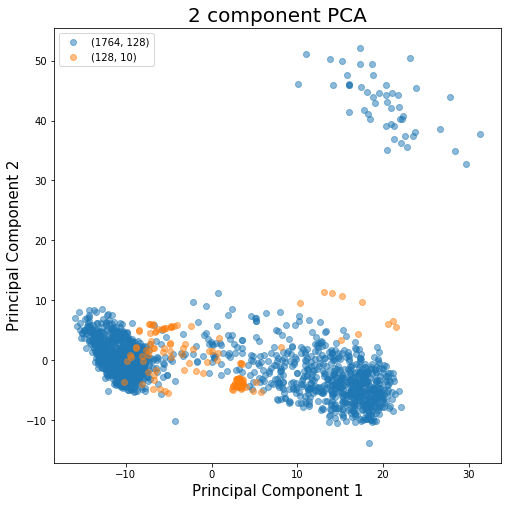

In [89]:
plot_fc_weights(weights_list=[weights_fc1, weights_fc_out])